In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

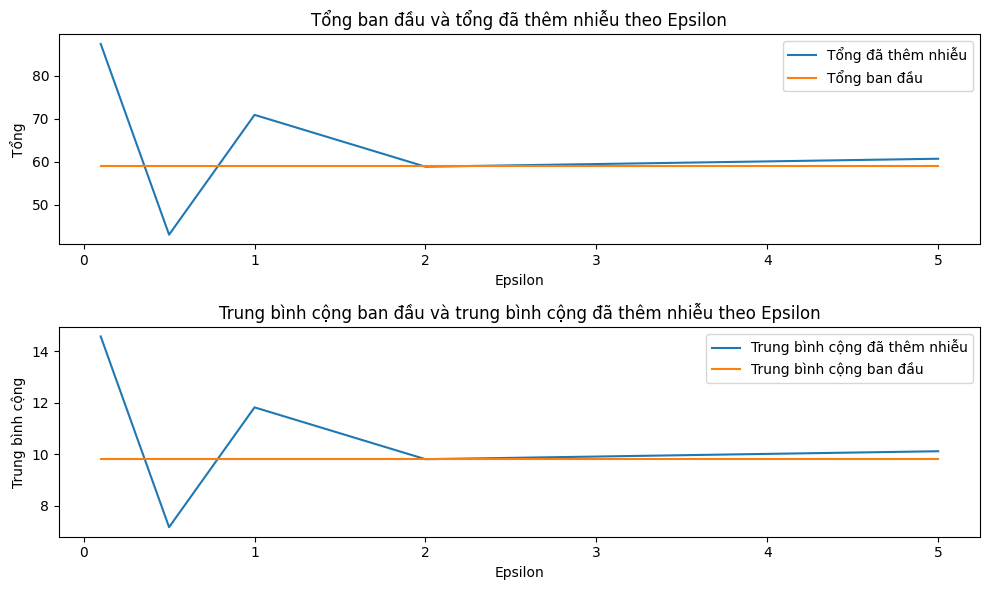


Bảng đánh giá:
 Epsilon  Tổng đã thêm nhiễu  Trung bình cộng đã thêm nhiễu  Sai số tuyệt đối (Tổng)  Sai số tuyệt đối (Trung bình cộng)
     0.1           87.427595                      14.571266                28.427595                            4.737932
     0.5           43.009656                       7.168276                15.990344                            2.665057
     1.0           70.911821                      11.818637                11.911821                            1.985304
     2.0           58.843707                       9.807284                 0.156293                            0.026049
     5.0           60.694983                      10.115830                 1.694983                            0.282497
------------------------------------------------------------------------------------------------------------------------


In [5]:
def lap_noise(value, sensitivity, epsilon):
    """Áp dụng nhiễu Laplace cho một giá trị.

    Args:
        value: Giá trị cần thêm nhiễu.
        sensitivity: Độ nhạy của giá trị, tức là phạm vi thay đổi tối đa của giá trị do một thay đổi đơn vị trong dữ liệu gốc.
        epsilon: Tham số kiểm soát mức độ nhiễu, càng lớn thì nhiễu càng ít.

    Returns:
        Giá trị đã thêm nhiễu.
    """
    return value + np.random.laplace(scale=sensitivity/epsilon)

def aggregate_with_noise(values, sensitivity, epsilon):
    """Thống kê tổng và trung bình cộng với nhiễu Laplace.

    Args:
        values: Danh sách các giá trị trả lời YES cần thống kê.
        sensitivity: Độ nhạy của giá trị, tức là phạm vi thay đổi tối đa của giá trị do một thay đổi đơn vị trong dữ liệu gốc.
        epsilon: Tham số kiểm soát mức độ nhiễu, càng lớn thì nhiễu càng ít.

    Returns:
        Tuple chứa tổng và trung bình cộng đã thêm nhiễu.
    """
    noisy_sum = sum([lap_noise(value, sensitivity, epsilon) for value in values])
    noisy_mean = noisy_sum / len(values)
    return noisy_sum, noisy_mean

# Dữ liệu mẫu
values = [10, 15, 2, 7, 10, 15] #Danh sách các giá trị trả lời YES
sensitivity = 3 
epsilon_values = [0.1, 0.5, 1, 2, 5] # Các giá trị epsilon để đánh giá

# Thống kê
original_sum = sum(values)
original_mean = sum(values) / len(values)

# Lưu trữ kết quả cho đánh giá
results = []

for epsilon in epsilon_values:
    noisy_sum, noisy_mean = aggregate_with_noise(values, sensitivity, epsilon)
    
    # Kiểm tra và xử lý kết quả âm
    noisy_sum = max(noisy_sum, 0) # Đặt tổng bằng 0 nếu kết quả âm
    noisy_mean = max(noisy_mean, 0) # Đặt trung bình bằng 0 nếu kết quả âm
    
    # Tính sai số tuyệt đối
    abs_error_sum = abs(noisy_sum - original_sum)
    abs_error_mean = abs(noisy_mean - original_mean)
    
    results.append({
        "epsilon": epsilon,  # Giá trị epsilon được sử dụng trong lần tính toán này
        "noisy_sum": noisy_sum,  # Tổng đã thêm nhiễu Laplace
        "noisy_mean": noisy_mean,  # Trung bình cộng đã thêm nhiễu Laplace
        "abs_error_sum": abs_error_sum,  # Sai số tuyệt đối của tổng (so với tổng ban đầu)
        "abs_error_mean": abs_error_mean  # Sai số tuyệt đối của trung bình cộng (so với trung bình cộng ban đầu)
    })


# Tạo DataFrame từ kết quả
df_results = pd.DataFrame(results)

# Đổi tên cột
df_results.rename(columns={
    "epsilon": "Epsilon",
    "noisy_sum": "Tổng đã thêm nhiễu",
    "noisy_mean": "Trung bình cộng đã thêm nhiễu",
    "abs_error_sum": "Sai số tuyệt đối (Tổng)",
    "abs_error_mean": "Sai số tuyệt đối (Trung bình cộng)"
}, inplace=True)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(epsilon_values, df_results["Tổng đã thêm nhiễu"], label="Tổng đã thêm nhiễu")
plt.plot(epsilon_values, [original_sum] * len(epsilon_values), label="Tổng ban đầu")
plt.xlabel("Epsilon")
plt.ylabel("Tổng")
plt.title("Tổng ban đầu và tổng đã thêm nhiễu theo Epsilon")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epsilon_values, df_results["Trung bình cộng đã thêm nhiễu"], label="Trung bình cộng đã thêm nhiễu")
plt.plot(epsilon_values, [original_mean] * len(epsilon_values), label="Trung bình cộng ban đầu")
plt.xlabel("Epsilon")
plt.ylabel("Trung bình cộng")
plt.title("Trung bình cộng ban đầu và trung bình cộng đã thêm nhiễu theo Epsilon")
plt.legend()

plt.tight_layout()
plt.show()

# In bảng đánh giá
print("\nBảng đánh giá:")
print(df_results.to_string(index=False)) 
print("-" * 120)



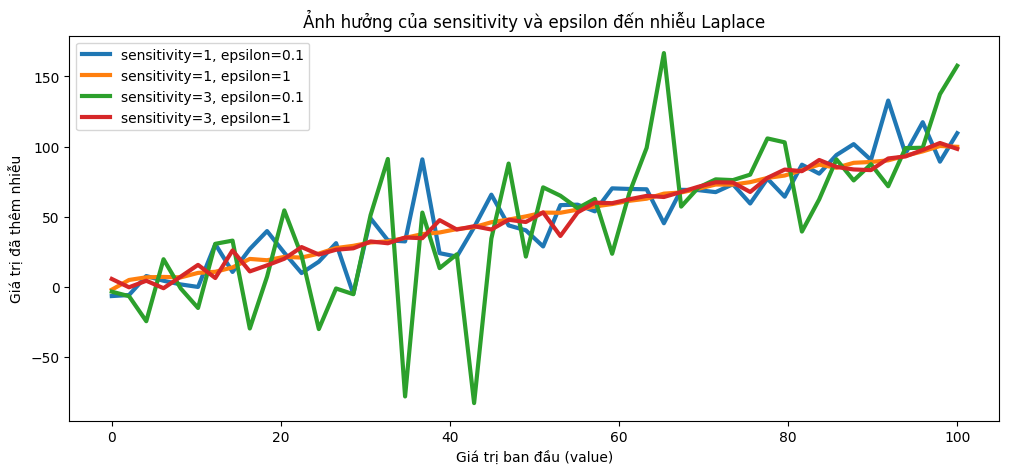

In [50]:
def lap_noise(value, sensitivity, epsilon):
    """Áp dụng nhiễu Laplace cho một giá trị.
    """
    return value + np.random.laplace(scale=sensitivity/epsilon)

# Các trường hợp cố định cho sensitivity và epsilon
sensitivity_values = [1, 3]
epsilon_values = [0.1, 1]

# Tạo giá trị value
values = np.linspace(0, 100)

# Vẽ biểu đồ dòng
plt.figure(figsize=(12, 5))

for sensitivity in sensitivity_values:
    for epsilon in epsilon_values:
        noisy_values = [lap_noise(value, sensitivity, epsilon) for value in values]
        plt.plot(values, noisy_values, label=f"sensitivity={sensitivity}, epsilon={epsilon}", linewidth=3)

plt.xlabel("Giá trị ban đầu (value)")
plt.ylabel("Giá trị đã thêm nhiễu")
plt.title("Ảnh hưởng của sensitivity và epsilon đến nhiễu Laplace")
plt.legend()
plt.show()

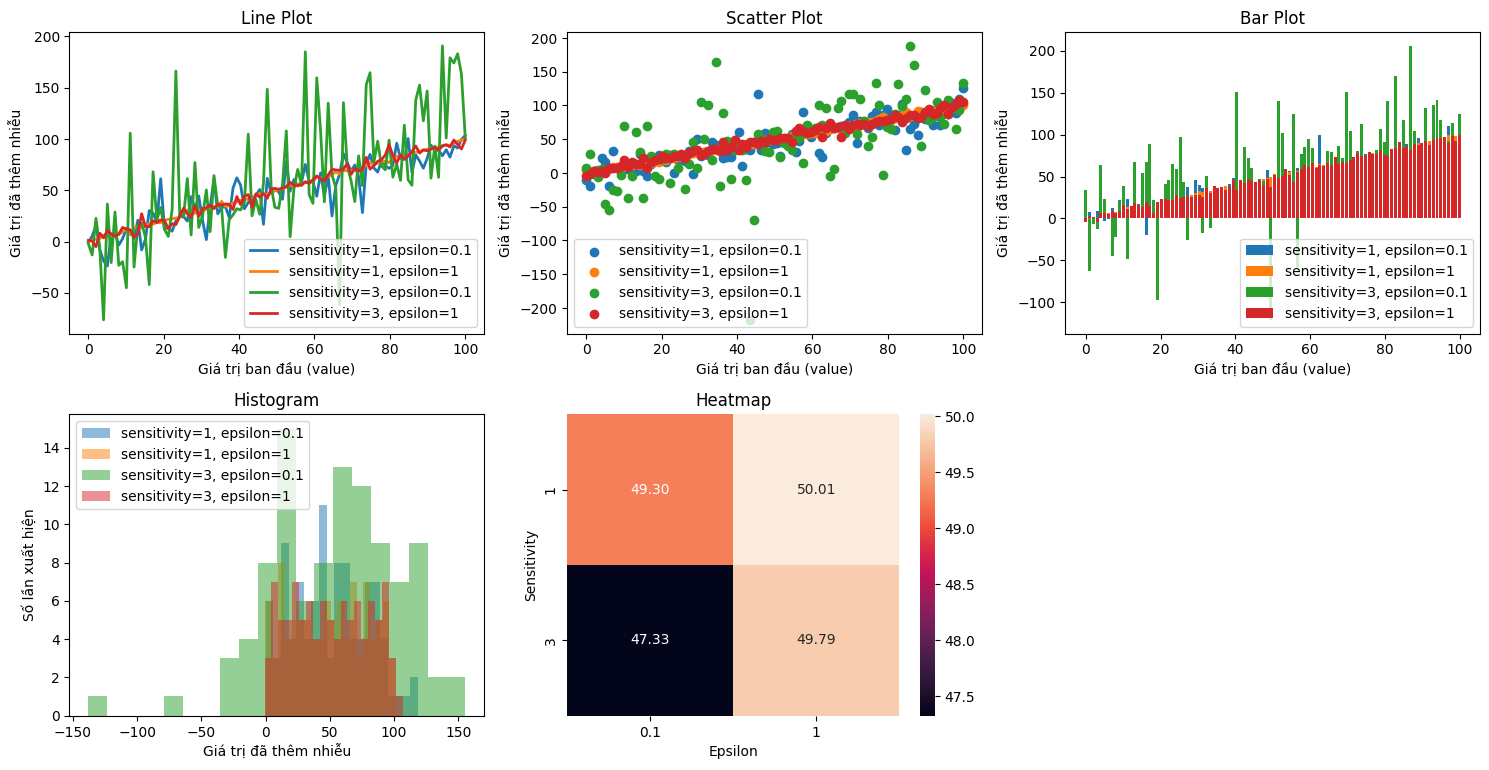

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def lap_noise(value, sensitivity, epsilon):
    """Áp dụng nhiễu Laplace cho một giá trị.
    """
    return value + np.random.laplace(scale=sensitivity/epsilon)

# Các trường hợp cố định cho sensitivity và epsilon
sensitivity_values = [1, 3]
epsilon_values = [0.1, 1]

# Tạo giá trị value
values = np.linspace(0, 100, 100) 

# Vẽ các biểu đồ
plt.figure(figsize=(15, 15))

# 1. Line Plot (Biểu đồ đường)
plt.subplot(4, 3, 1) 
for sensitivity in sensitivity_values:
    for epsilon in epsilon_values:
        noisy_values = [lap_noise(value, sensitivity, epsilon) for value in values]
        plt.plot(values, noisy_values, label=f"sensitivity={sensitivity}, epsilon={epsilon}", linewidth=2)
plt.xlabel("Giá trị ban đầu (value)")
plt.ylabel("Giá trị đã thêm nhiễu")
plt.title("Line Plot")
plt.legend()

# 2. Scatter Plot (Biểu đồ phân tán)
plt.subplot(4, 3, 2) 
for sensitivity in sensitivity_values:
    for epsilon in epsilon_values:
        noisy_values = [lap_noise(value, sensitivity, epsilon) for value in values]
        plt.scatter(values, noisy_values, label=f"sensitivity={sensitivity}, epsilon={epsilon}")
plt.xlabel("Giá trị ban đầu (value)")
plt.ylabel("Giá trị đã thêm nhiễu")
plt.title("Scatter Plot")
plt.legend()

# 3. Bar Plot (Biểu đồ thanh)
plt.subplot(4, 3, 3)
for sensitivity in sensitivity_values:
    for epsilon in epsilon_values:
        noisy_values = [lap_noise(value, sensitivity, epsilon) for value in values]
        plt.bar(values, noisy_values, label=f"sensitivity={sensitivity}, epsilon={epsilon}")
plt.xlabel("Giá trị ban đầu (value)")
plt.ylabel("Giá trị đã thêm nhiễu")
plt.title("Bar Plot")
plt.legend()

# 4. Histogram (Biểu đồ tần suất)
plt.subplot(4, 3, 4)
for sensitivity in sensitivity_values:
    for epsilon in epsilon_values:
        noisy_values = [lap_noise(value, sensitivity, epsilon) for value in values]
        plt.hist(noisy_values, bins=20, label=f"sensitivity={sensitivity}, epsilon={epsilon}", alpha=0.5)
plt.xlabel("Giá trị đã thêm nhiễu")
plt.ylabel("Số lần xuất hiện")
plt.title("Histogram")
plt.legend()


# 5. Heatmap (Bản đồ nhiệt)
plt.subplot(4, 3, 5) 
# Tạo dữ liệu cho heatmap
heatmap_data = np.zeros((len(sensitivity_values), len(epsilon_values)))
for i, sensitivity in enumerate(sensitivity_values):
    for j, epsilon in enumerate(epsilon_values):
        noisy_values = [lap_noise(value, sensitivity, epsilon) for value in values]
        heatmap_data[i, j] = np.mean(noisy_values)
        
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=epsilon_values, yticklabels=sensitivity_values)
plt.xlabel("Epsilon")
plt.ylabel("Sensitivity")
plt.title("Heatmap")

plt.tight_layout()
plt.show()